In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
from tradingcore.execution_manager import ExecutionManager
from tradingcore.campaign import Campaign
from tradingcore.account import Account
from tradingcore.moneymanagement import PlainMM

from exobuilder.data.datasource_mongo import DataSourceMongo
from exobuilder.data.datasource_sql import DataSourceSQL
from exobuilder.data.assetindex_mongo import AssetIndexMongo
from exobuilder.data.exostorage import EXOStorage

import pprint

In [3]:
try:
    from .settings import *
except SystemError:
    from scripts.settings import *

try:
    from .settings_local import *
except SystemError:
    try:
        from scripts.settings_local import *
    except ImportError:
        pass
    pass

In [4]:
assetindex = AssetIndexMongo(MONGO_CONNSTR, MONGO_EXO_DB)
storage = EXOStorage(MONGO_CONNSTR, MONGO_EXO_DB)
#datasource = DataSourceSQL(SQL_HOST, SQL_USER, SQL_PASS, assetindex, futures_limit=10, options_limit=10)
datasource = DataSourceMongo(MONGO_CONNSTR, MONGO_EXO_DB, assetindex, futures_limit=10, options_limit=10, exostorage=storage)


In [5]:
exmgr = ExecutionManager(MONGO_CONNSTR, datasource, dbname=MONGO_EXO_DB)

In [6]:
campaigns = exmgr.campaign_load_all()
accounts = exmgr.account_load_all()
pp = pprint.PrettyPrinter(indent=4)

## List of available campaigns

In [7]:
[print(x) for x in campaigns.keys()];

NG_Bear
CL_Bullish
CL_Bear
ZN_Bear
NG_Bull
CL_Sample
test_campaign
CL_Bull


In [8]:
swm_info = storage.swarms_info()
pp.pprint(swm_info)

{   '_id': None,
    'alphas': [   'RenkoPatternsNoExits',
                  'SwingPoint',
                  'EXO',
                  'PointAndFigure',
                  'IchimokuCloud',
                  'MACross',
                  'BolllingerBands'],
    'exo_types': [   'CallSpread',
                     'PutSpread',
                     'ContFut',
                     'BullishCollarBW',
                     'BearishCollarBW'],
    'instruments': ['ZC', 'NG', 'ZN', 'ES', 'ZS', 'CL', 'ZW']}


# Alphas list

In [9]:
instruments_filter = ['ZN']  # Select ALL
#instruments_filter = ['ES', 'CL']

exo_filter = ['*'] # Select ALL
#exo_filter = ['BullishCollar']

direction_filter = [0, -1, 1] # Select ALL
#direction_filter = [1]

alpha_filter = ['']  # Select ALL
#alpha_filter = ['MaCross', 'PointAndFigurePatterns']

swmdf, swm_data = storage.swarms_list(instruments_filter, direction_filter, alpha_filter, exo_filter)

[print(s) for s in sorted(swmdf.columns)];

ZN_BearishCollarBW_Long_EXO
ZN_BearishCollarBW_Short_EXO
ZN_BullishCollarBW_Long_EXO
ZN_BullishCollarBW_Short_EXO
ZN_CallSpread_Long_EXO
ZN_CallSpread_Long_IchimokuCloud_alt2-bearish-custom
ZN_CallSpread_Long_MACross_bullish-custom
ZN_CallSpread_Long_SwingPoint_bullish-custom
ZN_CallSpread_Short_BolllingerBands_alt2-bearish-custom
ZN_CallSpread_Short_BolllingerBands_alt3-bearish-custom
ZN_CallSpread_Short_BolllingerBands_bearish-custom
ZN_CallSpread_Short_BolllingerBands_bullish-custom
ZN_CallSpread_Short_EXO
ZN_CallSpread_Short_IchimokuCloud_bearish-custom
ZN_ContFut_Long_EXO
ZN_ContFut_Short_EXO
ZN_PutSpread_Long_EXO
ZN_PutSpread_Long_IchimokuCloud_bearish-custom
ZN_PutSpread_Short_BolllingerBands_alt2-bullish-custom
ZN_PutSpread_Short_BolllingerBands_bullish-custom
ZN_PutSpread_Short_EXO
ZN_PutSpread_Short_IchimokuCloud_alt2-bearish-custom
ZN_PutSpread_Short_IchimokuCloud_alt2-bullish-custom
ZN_PutSpread_Short_IchimokuCloud_alt3-bullish-custom
ZN_PutSpread_Short_IchimokuCloud_bullis

In [10]:
passive_exo = {}

exo_filter = '*'     # All 
#exo_filter = 'ES_'  # ES only
exo_filter = 'ZN*'  # ES Collars (incl Bearish, Bullish, BW and vanilla)


print('==== Passive EXO list')
for exo_name in storage.exo_list(exo_filter):
    passive_exo[exo_name], exo_dict = storage.load_series(exo_name)

for exo in sorted(passive_exo.keys()):
    print(exo)
    
print('==== Alphas EXO list')
[print(s) for s in sorted(swmdf.columns)];

==== Passive EXO list
ZN_BearishCollarBW
ZN_BullishCollarBW
ZN_CallSpread
ZN_ContFut
ZN_PutSpread
==== Alphas EXO list
ZN_BearishCollarBW_Long_EXO
ZN_BearishCollarBW_Short_EXO
ZN_BullishCollarBW_Long_EXO
ZN_BullishCollarBW_Short_EXO
ZN_CallSpread_Long_EXO
ZN_CallSpread_Long_IchimokuCloud_alt2-bearish-custom
ZN_CallSpread_Long_MACross_bullish-custom
ZN_CallSpread_Long_SwingPoint_bullish-custom
ZN_CallSpread_Short_BolllingerBands_alt2-bearish-custom
ZN_CallSpread_Short_BolllingerBands_alt3-bearish-custom
ZN_CallSpread_Short_BolllingerBands_bearish-custom
ZN_CallSpread_Short_BolllingerBands_bullish-custom
ZN_CallSpread_Short_EXO
ZN_CallSpread_Short_IchimokuCloud_bearish-custom
ZN_ContFut_Long_EXO
ZN_ContFut_Short_EXO
ZN_PutSpread_Long_EXO
ZN_PutSpread_Long_IchimokuCloud_bearish-custom
ZN_PutSpread_Short_BolllingerBands_alt2-bullish-custom
ZN_PutSpread_Short_BolllingerBands_bullish-custom
ZN_PutSpread_Short_EXO
ZN_PutSpread_Short_IchimokuCloud_alt2-bearish-custom
ZN_PutSpread_Short_Ichimok

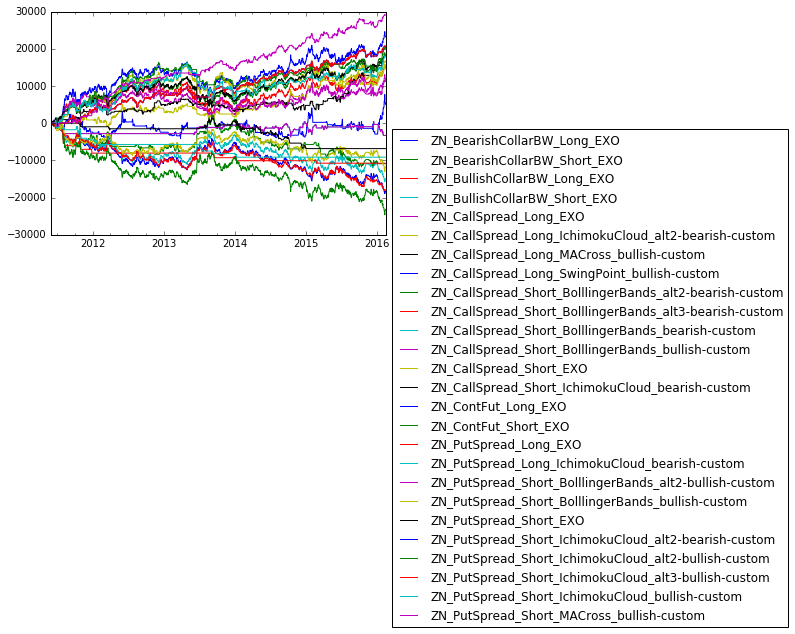

In [11]:
swmdf.plot().legend(loc='best', bbox_to_anchor=(1, 0.5));

# Campaign composition

In [12]:
 campaign_dict = {
            'name': 'ZN_Bull',
            'description': 'Bullish Expression of 10 Year Notes',
            'alphas': {
                'ZN_CallSpread_Long_MACross_bullish-custom ': {
                    'qty': 1.0,
                },
             'ZN_CallSpread_Long_SwingPoint_bullish-custom': {
                    'qty': 1.0,
                },
             'ZN_CallSpread_Short_BolllingerBands_bullish-custom': {
                    'qty': 1.0,
                },
             'ZN_PutSpread_Short_IchimokuCloud_alt3-bullish-custom': {
                    'qty': 1.0,
                },
             'ZN_PutSpread_Short_IchimokuCloud_bullish-custom': {
                    'qty': 1.0,
                },
            'ZN_PutSpread_Short_MACross_bullish-custom': {
                    'qty': 1.0,
                },
            'ZN_PutSpread_Short_EXO': {
                    'qty': 1.0,
                },
            
            }
        }

In [13]:
cmp = Campaign(campaign_dict, datasource)

### Save campaign

In [14]:
exmgr.campaign_save(cmp)

## Campaign positions

### Alphas positions

In [15]:
pp.pprint(cmp.alphas_positions)

{   'ZN_CallSpread_Long_SwingPoint_bullish-custom': {   'exo_name': 'ZN_CallSpread',
                                                        'exposure': 2.0,
                                                        'prev_exposure': 2.0},
    'ZN_CallSpread_Short_BolllingerBands_bullish-custom': {   'exo_name': 'ZN_CallSpread',
                                                              'exposure': 0.0,
                                                              'prev_exposure': 0.0},
    'ZN_PutSpread_Short_EXO': {   'exo_name': 'ZN_PutSpread',
                                  'exposure': -1.0,
                                  'prev_exposure': -1.0},
    'ZN_PutSpread_Short_IchimokuCloud_alt3-bullish-custom': {   'exo_name': 'ZN_PutSpread',
                                                                'exposure': -1.0,
                                                                'prev_exposure': -1.0},
    'ZN_PutSpread_Short_IchimokuCloud_bullish-custom': {   'exo_name': 'ZN

### EXO net positions

In [16]:
pp.pprint(cmp.exo_positions)

{   'ZN_CallSpread': {'exposure': 2.0, 'prev_exposure': 2.0},
    'ZN_PutSpread': {'exposure': -5.0, 'prev_exposure': -5.0}}


### Contracts positions

In [17]:
pp.pprint(cmp.positions)

{   'C_US_TYAH1612800': {   'asset': {   '_id': ObjectId('57aae7b434ac2255e595d46b'),
                                         '_type': 'opt',
                                         'callorput': 'C',
                                         'cqgsymbol': 'C.US.TYAH1612800',
                                         'expirationdate': datetime.datetime(2016, 2, 19, 0, 0),
                                         'idcontract': 5549,
                                         'idinstrument': 2,
                                         'idoption': 11643548,
                                         'name': 'C.US.TYAH1612800',
                                         'optionmonth': 'H',
                                         'optionmonthint': 3,
                                         'optionname': 'C.US.TYAH1612800',
                                         'optionyear': 2016,
                                         'strikeprice': 128.0},
                            'prev_qty': 2.0,
      